# DLProfile Example using Bert Application

## Set imports and neccessary environment variables

In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas

In [2]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [3]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

#### Formatting

In [4]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [5]:
from src.vanidl import VaniDL
profile = VaniDL()

In [6]:
#import shutil
#shutil.rmtree('/tmp/temp_analysis')

In [7]:

DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/apps/bert/bert_run1_p1.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

[============================================================] 100.0% 3872 of 3872 Parsing DXT File 
[============================================================] 100.0% 88500 of 88500 Parsing Darshan File 
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [13]:
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].unique().tolist())
df['Length'].sum()

'Files used in the application'
['/projects/datascience/dhari/datasets/bert/base/bert_config.json',
 '/projects/datascience/dhari/datasets/bert/base/vocab.txt']


231796

In [9]:
df_normal = profile.GetTraceAsDF()
pp.pprint("Files used in the application")
pp.pprint(df_normal['Filename'].unique().tolist())

'Files used in the application'
['/projects/datascience/dhari/datasets/bert/base/vocab.txt',
 '/projects/datascience/dhari/datasets/bert/base/bert_config.json',
 '/home/dhari/output/model.ckpt-2_temp_fe5a2c083033481dbfb4c9e5dd7ad386/part-00000-of-00001.data-00000-of-00001.tempstate13335707987670392325',
 '/home/dhari/output/model.ckpt-2.meta.tmpdd68187121044651b2a10aff2fcb311f',
 '/home/dhari/output/checkpoint.tmp36f5b43096b64b0d809d31ad2ef71164',
 '/home/dhari/output/events.out.tfevents.1592669194.nid00000',
 '/home/dhari/output/graph.pbtxt.tmpaa880e27091b475184cffdce65511011',
 '<STDERR>',
 '/home/dhari/output/model.ckpt-2_temp_fe5a2c083033481dbfb4c9e5dd7ad386/part-00000-of-00001.index.tempstate17224637379092307897',
 '/home/dhari/output/model.ckpt-0.index',
 '/home/dhari/output/model.ckpt-0.meta.tmpb323046f89ce45a9a5dedd229488f2e2',
 '/home/dhari/output/train.tf_record',
 '/home/dhari/output/model.ckpt-2.index',
 '/home/dhari/output/model.ckpt-0_temp_fe5a2c083033481dbfb4c9e5dd7ad386

### Collect the summary of the Application

In [10]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	1170.00 seconds
Time spent in I/O		:	0.03 seconds
% Time spent in I/O		:	0.00%
Total Data Accessed		:	2.48 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read']
# of files used			:	2
# of MPI Ranks			:	1 ranks
Data Transfer size:
	Min,Max			:	0 bytes and 231508 bytes
	Average			:	46359 bytes
	Median			:	0 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	0 B/s and 16 MB/s
	Average			:	3 MB/s
	Median			:	0 MB/s
Access Pattern:
	Sequential		:	60.00%
	Consecutive		:	60.00%


Files Summary:
File Types			:	['json' 'txt']
Dataset Size:
	Total			:	0.014 GB
	Min,Max			:	0.000 GB and 0.012 GB
	Average			:	0.002 GB


In [10]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 897.0 seconds'


In [14]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()))

'Time spent by application on I/O: 0.031299999999999994 seconds'


### I/O time spent on each file

In [15]:
for file in df['Filename'].unique():
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /projects/datascience/dhari/datasets/bert/base/bert_config.json: 0.02 seconds
I/O time for file /projects/datascience/dhari/datasets/bert/base/vocab.txt: 0.01 seconds


### I/O Time spent per rank

In [16]:
for rank in df['Rank'].unique():
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 0.03 seconds


In [17]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 2.48 GB'

### I/O performed on each file

In [18]:
for file in df['Filename'].unique():
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /projects/datascience/dhari/datasets/bert/base/bert_config.json: 0.00 MB
I/O performed on file /projects/datascience/dhari/datasets/bert/base/vocab.txt: 0.22 MB


In [19]:
for rank in df['Rank'].unique():
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 0.22 MB


In [20]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'bert_config': 288.0,
 'events.out.tfevents.1592669194': 12883219.0,
 'model.ckpt-0': 22764.0,
 'model.ckpt-2': 22764.0,
 'train': 2104614.0,
 'vocab': 231508.0}


### How application access data over time.

[============================================================] 100.0% 5 of 5 Creating Timeline 


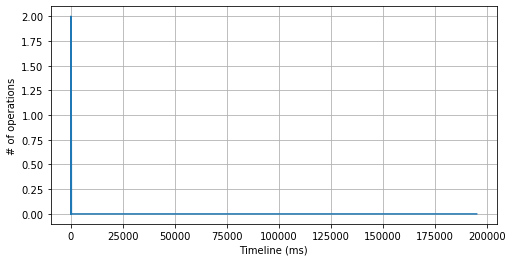

In [21]:
tl = profile.CreateIOTimeline()
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("# of operations")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['operation_count']);

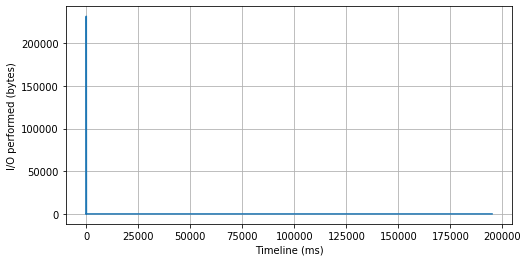

In [22]:
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("I/O performed (bytes)")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

[============================================================] 100.0% 2 of 2 Creating Timeline 


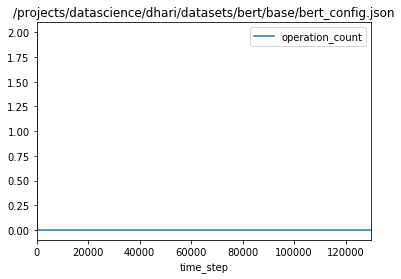

[============================================================] 100.0% 3 of 3 Creating Timeline 


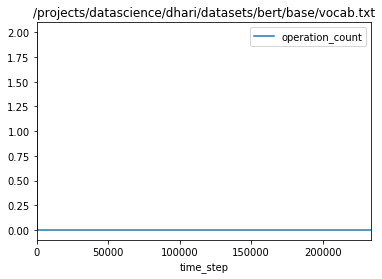

In [23]:
for file in df['Filename'].unique():
    tl = profile.CreateIOTimeline(filepath=file)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

[============================================================] 100.0% 5 of 5 Creating Timeline 


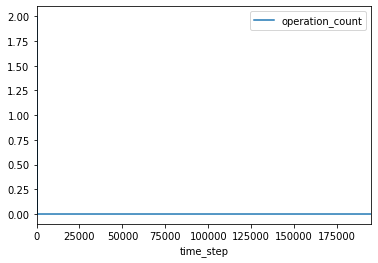

In [24]:
for rank in df['Rank'].unique():
    tl = profile.CreateIOTimeline(rank=rank)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

Text(0.5, 0, 'Transfer Size (bytes)')

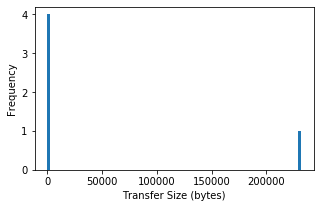

In [25]:
request_df = profile.GetIORequestDistribution()
df['Length'].plot(kind='hist', figsize=(5, 3), bins=100);
plt.xlabel("Transfer Size (bytes)")

### Data Transfer Size distribution for each file.

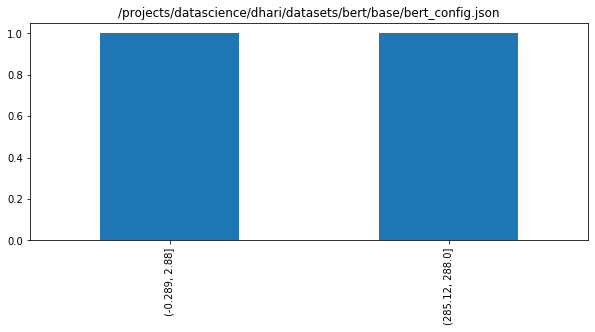

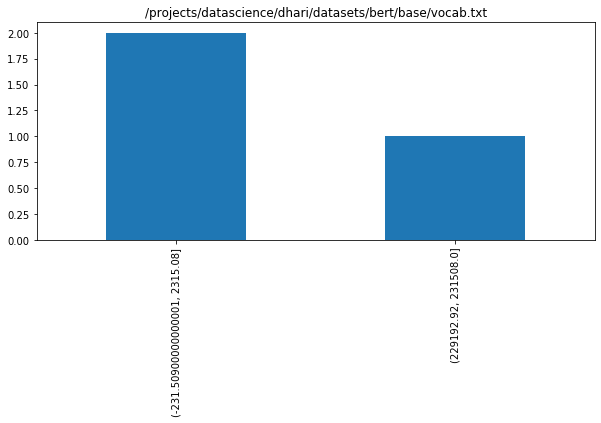

In [26]:
for file in df['Filename'].unique():
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)
    plt.show()

### Data Transfer Sizes per Rank

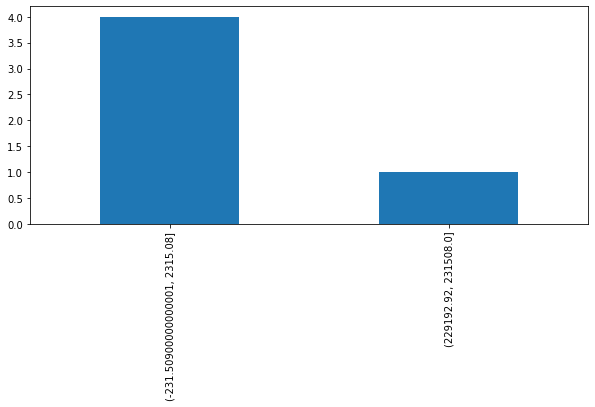

In [27]:
for rank in df['Rank'].unique():
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [29]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique():
    pp.pprint(profile.GetFileSummary(file))

{'ext': 'json',
 'filename': 'bert_config',
 'io_size': 288,
 'io_time': 0.017100000000000004,
 'path': '/projects/datascience/dhari/datasets/bert/base/bert_config.json',
 'size': 288,
 'special': {}}
{'ext': 'txt',
 'filename': 'vocab',
 'io_size': 231508,
 'io_time': 0.01419999999999999,
 'path': '/projects/datascience/dhari/datasets/bert/base/vocab.txt',
 'size': 231508,
 'special': {}}
